#                  Loan Status Prediction Using Machine Learning 

### In this project, I am going to work on binary classification problem, where we got some information about sample of peoples and we need to predict whether we should give someone a loan or not ,depending on his information .

### we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

# Importing some important librarys
#### we have imported following python libraries---------------------------
### Numpy-NumPy is a Python library used for working with arrays.
### Pandas – To load the Dataframe
### Matplotlib – To visualize the data features i.e. barplot
### Seaborn – To see the correlation between features using heatmap

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 loan= pd.read_csv('dataset_loan_prediction.csv')

# About the data
### Loan_ID :     Unique Loan ID

### Gender : Male/ Female

### Married : Applicant married (Y/N)

### Dependents : Number of dependents

### Education : Applicant Education (Graduate/ Under Graduate)

### Self_Employed : Self employed (Y/N)

### ApplicantIncome : Applicant income

### CoapplicantIncome : Coapplicant income

### LoanAmount : Loan amount in thousands of dollars

### Loan_Amount_Term : Term of loan in months

### Credit_History : Credit history meets guidelines yes or no

### Property_Area : Urban/ Semi Urban/ Rural

### Loan_Status : Loan approved (Y/N) this is the target variable

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [6]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

In [7]:
loan.shape

(614, 13)

In [8]:
print("Number of Rows",loan.shape[0])
print("Number of Columns",loan.shape[1])

Number of Rows 614
Number of Columns 13


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Check Null Values In The Dataset
### we check for null values in dataset and so we can see lot of null values there in my data.so if  i can't  remove all these null values¶because my dataset is less so i  find the percentage of every null values column and if percentage of column is less than 5 then i removed otherwise fill all null values by mod,median,mean.

In [10]:
loan.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan.isnull().sum()*100 / len(loan)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [13]:
len(loan)

614

# Handling The missing Values

### Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using drop() function.

In [14]:
loan = loan.drop('Loan_ID',axis=1)

In [15]:
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [16]:
loan.duplicated().any()

# we got no duplicated rows

False

In [17]:
loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term','Married']

In [19]:
loan = loan.dropna(subset=columns)

In [20]:
loan.isnull().sum()*100 / len(loan)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [21]:
loan['Self_Employed'].mode()[0]

'No'

In [22]:
loan['Self_Employed'] =loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [23]:
loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
loan.isnull().sum()*100 / len(loan)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [25]:
loan['Credit_History'].mode()[0]

1.0

In [26]:
loan['Credit_History'] =loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

In [27]:
loan['Credit_History'].unique()

array([1., 0.])

In [28]:
loan.isnull().sum()*100 / len(loan)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [29]:
loan.shape

(553, 12)

###  Handling Categorical Columns

In [30]:
loan.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
482,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
149,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
219,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,1.0,Semiurban,Y


In [31]:
# replacing the value of 3+ to 4
loan['Dependents'] =loan['Dependents'].replace(to_replace="3+",value='4')

In [32]:
loan['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [33]:
# Dependent column values
loan['Dependents'].value_counts()

0    316
1     96
2     96
4     45
Name: Dependents, dtype: int64

In [34]:
loan.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
480,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
359,Male,Yes,4,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y
469,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
115,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
543,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y


In [35]:
loan['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [36]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Visualization
## Pair Plot

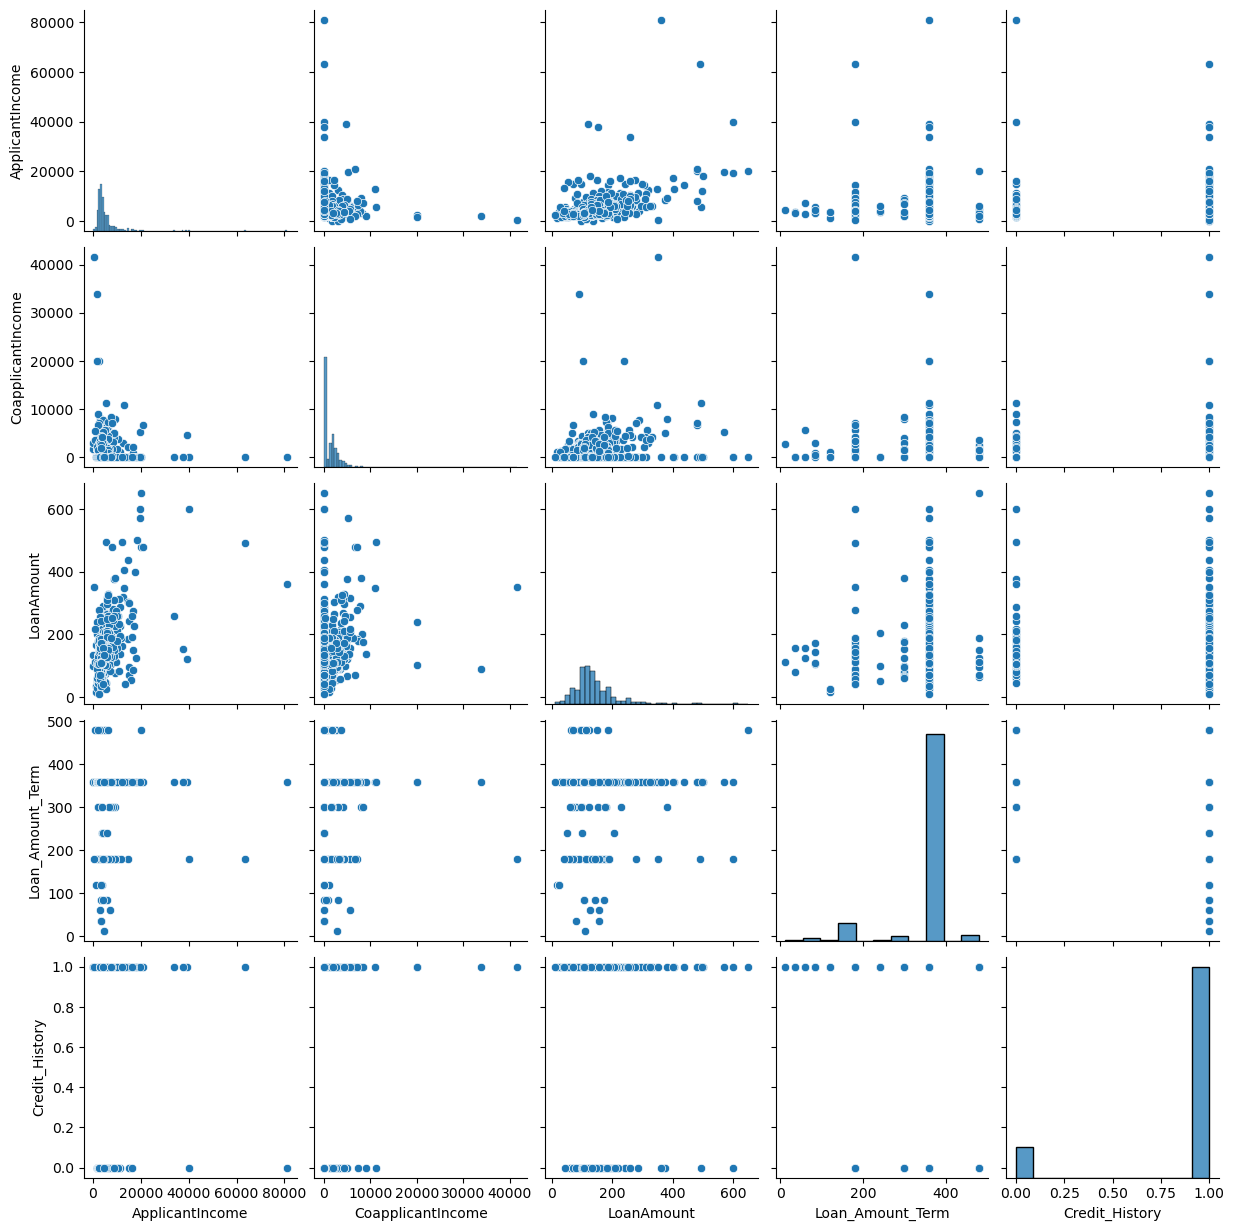

In [37]:

sns.pairplot(loan)

# Exploratory Data Analysis
### EDA is a crucial part of the project. It involves visualizing and exploring the data to understand sales patterns, trends, and relationships.

### I create barchart with the help of searborn library between.......

# Education & Loan Status

<Axes: xlabel='Education', ylabel='count'>

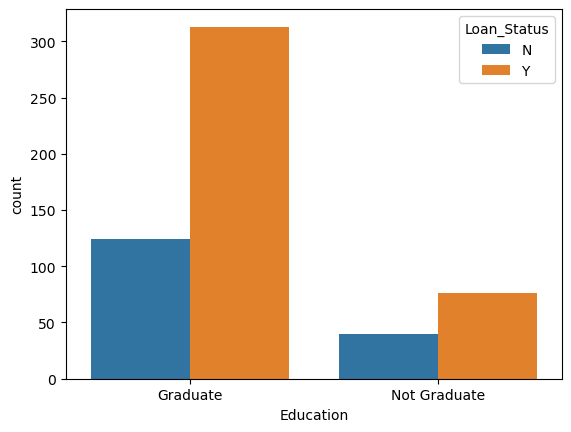

In [38]:
sns.countplot(x='Education',hue='Loan_Status',data=loan)


### Here you can see that most people did graduated, and most of them got a loan

# Marital status & Loan Status

<Axes: xlabel='Married', ylabel='count'>

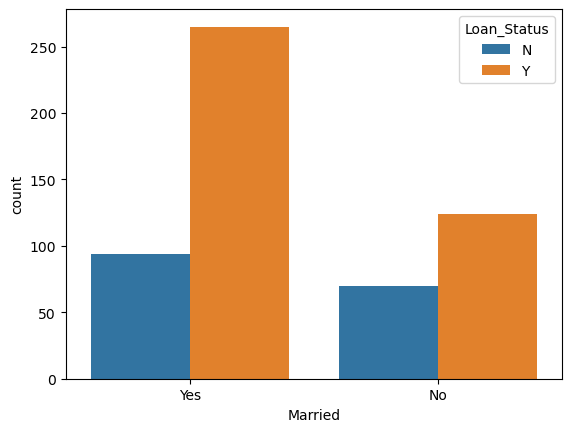

In [39]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)

### most people who get married did get a loan
### if you'r married then you have better chance to get a loan :)

# Gender and loan Status

<Axes: xlabel='Gender', ylabel='count'>

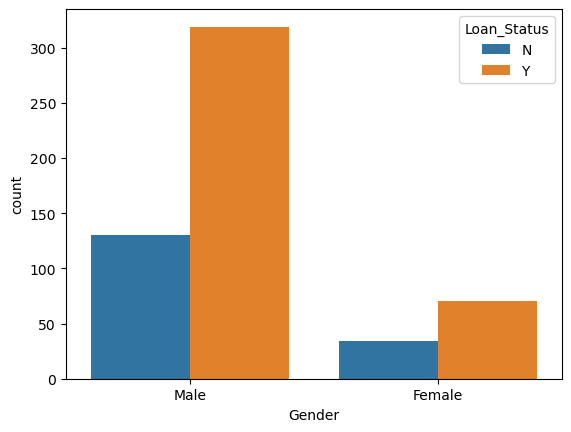

In [40]:
sns.countplot(x = 'Gender',hue = 'Loan_Status',data = loan)

###  There are more Men than Women (approx. 3x)

# Property_Area and Loan_Status

<Axes: xlabel='Property_Area', ylabel='count'>

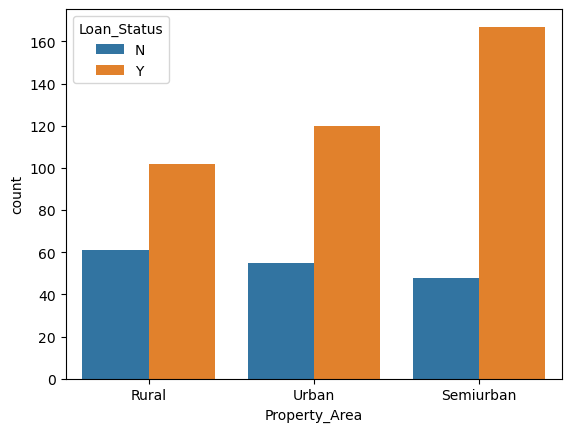

In [41]:
sns.countplot(x = 'Property_Area',hue = 'Loan_Status',data = loan)


### We can say, Semiurban Property_Area got more than 50% chance to get a loan

# Self employment and Loan_Status

<Axes: xlabel='Self_Employed', ylabel='count'>

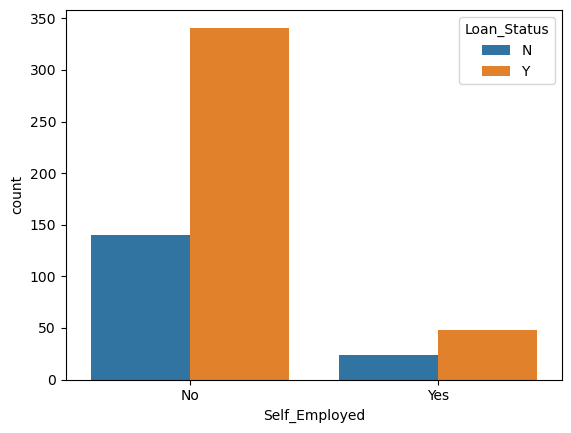

In [42]:
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status',data = loan)

### Employment: 5/6th of population is not self employed.

# Dependents and Loan_Status

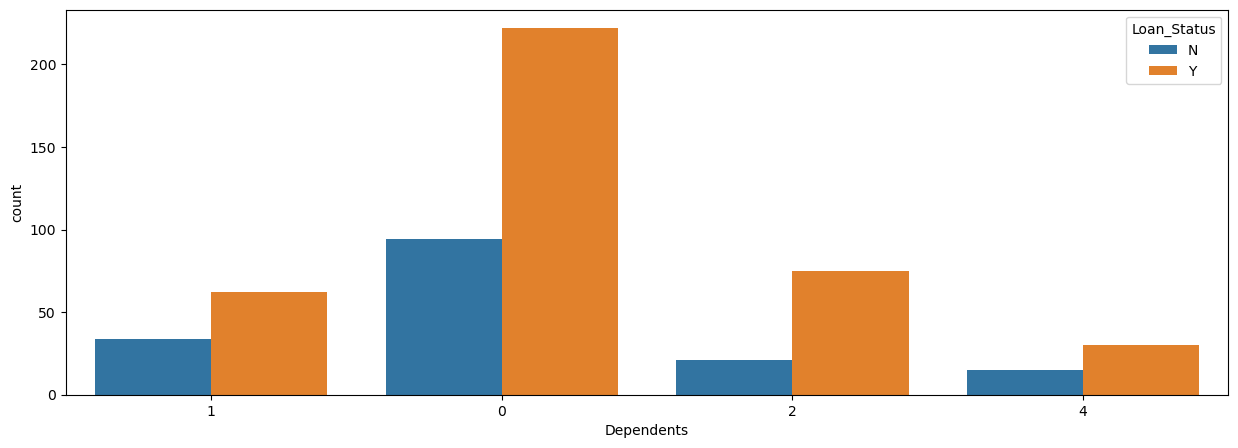

In [43]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan);



###  if Dependents = 0 , we got higher chance to get a loan ((very hight chance))


# Credit_History and Loan_Status

<Axes: xlabel='Credit_History', ylabel='count'>

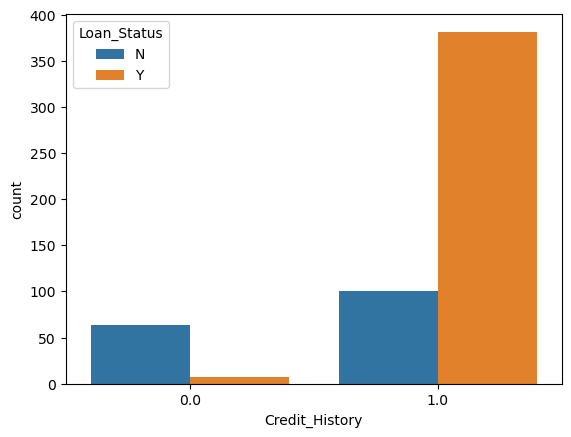

In [44]:
sns.countplot(x = 'Credit_History',hue = 'Loan_Status',data = loan)

### we didn't give a loan for most people who got Credit History = 0
### but we did give a loan for most of people who got Credit History = 1
### so we can say if you got Credit History = 1 , you will have better chance to get a loan



# Convert categorical columns to numerical values

In [45]:
loan['Gender'] = loan['Gender'].map({'Male':1,'Female':0}).astype('int')
loan['Married'] = loan['Married'].map({'Yes':1,'No':0}).astype('int')
loan['Education'] = loan['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
loan['Self_Employed'] = loan['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
loan['Property_Area'] = loan['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
loan['Loan_Status'] = loan['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [46]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1



# Separating the data and label

In [47]:
X = loan.drop('Loan_Status',axis=1)

In [48]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [49]:
y = loan['Loan_Status']

In [50]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

# Feature Scaling

In [51]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [52]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [53]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [54]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# Model Training and Evaluation
### As this is a classification problem so we will be using these models : 
## 1.Logistics Regression
## 2.Support Vector Classifiers (SVC)


To predict the accuracy we will use the accuracy score function from scikit-learn library.

###  Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [56]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


# Support Vector Classifiers (SVC)

In [58]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539
